In [1]:
from nltk.data import find
import gensim
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [291]:
import networkx as nx
def find_similar(model,word,n=5):
    words = model.most_similar(positive=[word], topn = 20)
    G.clear()
    for i,j in words:
        G.add_node(i)
        G.add_weighted_edges_from([(word, i, j*10/2.5)])
    for v in G.nodes():
        G.nodes[v]['word']=str(v)
    return G
    
G = find_similar(model,'university')

#G=Graph.copy()
#for i in Graph.nodes():
  #  G_new= find_similar(model,i)
 #   G.add_node(G_new)
#    G.add_edge(G_new, i)

In [292]:
G.edges.data()

EdgeDataView([('universities', 'university', {'weight': 2.801567554473877}), ('university', 'faculty', {'weight': 2.712362766265869}), ('university', 'undergraduate', {'weight': 2.634838581085205}), ('university', 'campus', {'weight': 2.5739951133728027}), ('university', 'college', {'weight': 2.554107904434204}), ('university', 'academic', {'weight': 2.52687931060791}), ('university', 'professors', {'weight': 2.519458770751953}), ('university', 'undergraduates', {'weight': 2.4599251747131348}), ('university', 'University', {'weight': 2.4557220935821533}), ('university', 'student', {'weight': 2.402160167694092}), ('university', 'colleges', {'weight': 2.329777717590332}), ('university', 'Universities', {'weight': 2.2875237464904785}), ('university', 'Faculty', {'weight': 2.2230427265167236}), ('university', 'regents', {'weight': 2.1973953247070312}), ('university', 'students', {'weight': 2.184843063354492}), ('university', 'institute', {'weight': 2.157468557357788}), ('university', 'camp

In [293]:
from bokeh.plotting import show
from bokeh.io import output_file, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4, Greens
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes

plot = Plot(plot_width=600, plot_height=600,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

plot.title.text = "Word Similarity Graph"
 
node_hover_tool = HoverTool(tooltips=[("word", "@word")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())


graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0), k=None, iterations=10)

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color='black')
graph_renderer.node_renderer.selection_glyph = Circle(size=25, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=25, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color='black', line_alpha=0.8, line_cap='square',\
                                              line_dash='dashdot')


graph_renderer.edge_renderer.data_source.data["line_width"] = [G.get_edge_data(a,b)['weight'] for a, b in G.edges()]
graph_renderer.edge_renderer.glyph.line_width = {'field': 'line_width'}


plot.renderers.append(graph_renderer)

labels = LabelSet(text='word', level='glyph',
              x_offset=5, y_offset=5, render_mode='canvas')

#citation = Label(x=70, y=70, x_units='screen', y_units='screen',
#                 text='Shayan Shamskolahi', render_mode='css',
#                 border_line_color=None, border_line_alpha=1.0,
#                 background_fill_color='white', background_fill_alpha=1.0)

#plot.add_layout(labels)
#plot.add_layout(citation)


#output_file("interactive_graphs.html")
#show(plot)


In [294]:
output_notebook()

Loading BokehJS ...

In [295]:
show(plot)

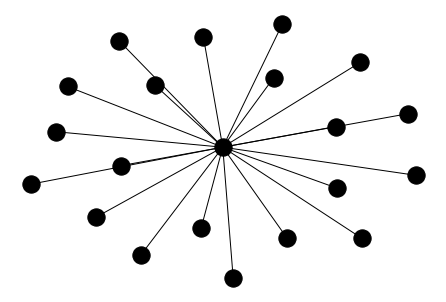

In [270]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='black')
plt.show()